## Importing the libraries and the packages

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Importing and loading the dataset

In [2]:
Train_Data = pd.read_csv('Train.csv')
Test_Data = pd.read_csv('Test.csv')

### Assessing the dataset

In [3]:
Train_Data.shape, Test_Data.shape

((8523, 12), (5681, 11))

* Observing the dataset to cheche for the typpe of data ie categorical,Quantitative,Qulitative

In [4]:
Train_Data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
Train_Data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Data cleaning and Feature Engineering

* removing the duplicates

In [6]:
 
Train_Data.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


* Checking for and dealing with missing values

In [7]:
Train_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               1
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               5
dtype: int64

* Imputing the missing values with the <b>median</b> for <b>continous</b> columns and the <b>mode</b> for <b>categorical</b> columns

In [8]:
Train_Data['Outlet_Size'].fillna(Train_Data['Outlet_Size'].mode()[0], inplace=True)
Train_Data['Item_Weight'].fillna(Train_Data['Item_Weight'].median(), inplace=True)
Train_Data['Item_Outlet_Sales'].fillna(Train_Data['Item_Outlet_Sales'].median(), inplace=True)

* Checking for missing values after the treatment

In [9]:
Train_Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            1
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

* Checking for and dearling with outliers

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>, <AxesSubplot: >]],
      dtype=object)

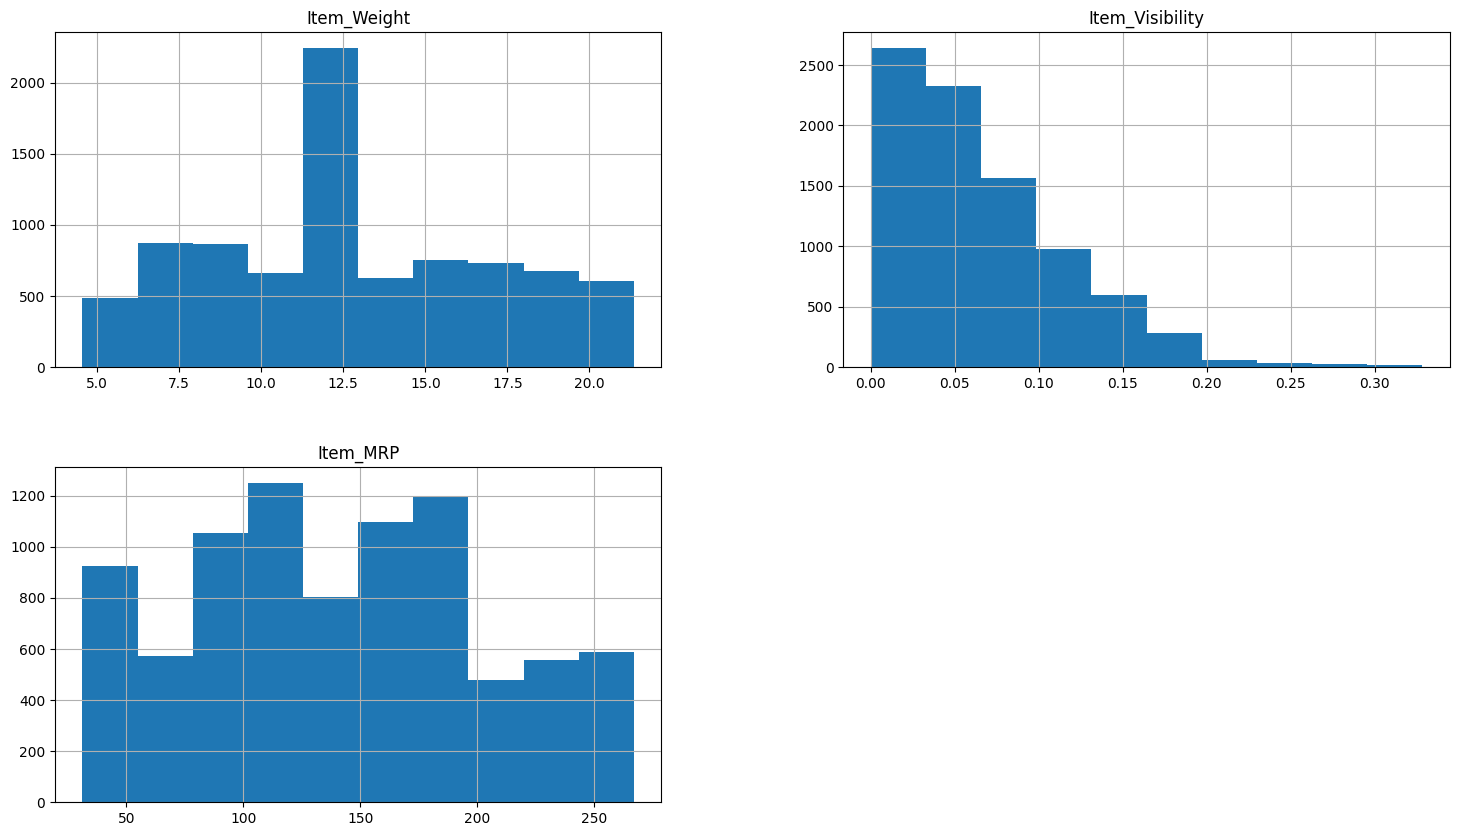

In [10]:
Train_Data.hist(['Item_Weight', 'Item_Visibility','Item_MRP'], figsize=(18,10))

* outlier treatment

In [11]:
# checking for the nearest logical values.
Train_Data['Item_Visibility'][Train_Data['Item_Visibility'] > 0.18].sort_values()

3216    0.180097
1839    0.180588
3408    0.180821
5599    0.181114
2675    0.181769
          ...   
2855    0.309390
7250    0.311090
1805    0.321115
3750    0.325781
854     0.328391
Name: Item_Visibility, Length: 228, dtype: float64

In [12]:
# replacing the values with the nearest logical values.
Train_Data['Item_Visibility'][Train_Data['Item_Visibility']>0.20]=0.181769

* Visualizing after treatment.

array([[<AxesSubplot: title={'center': 'Item_Visibility'}>]], dtype=object)

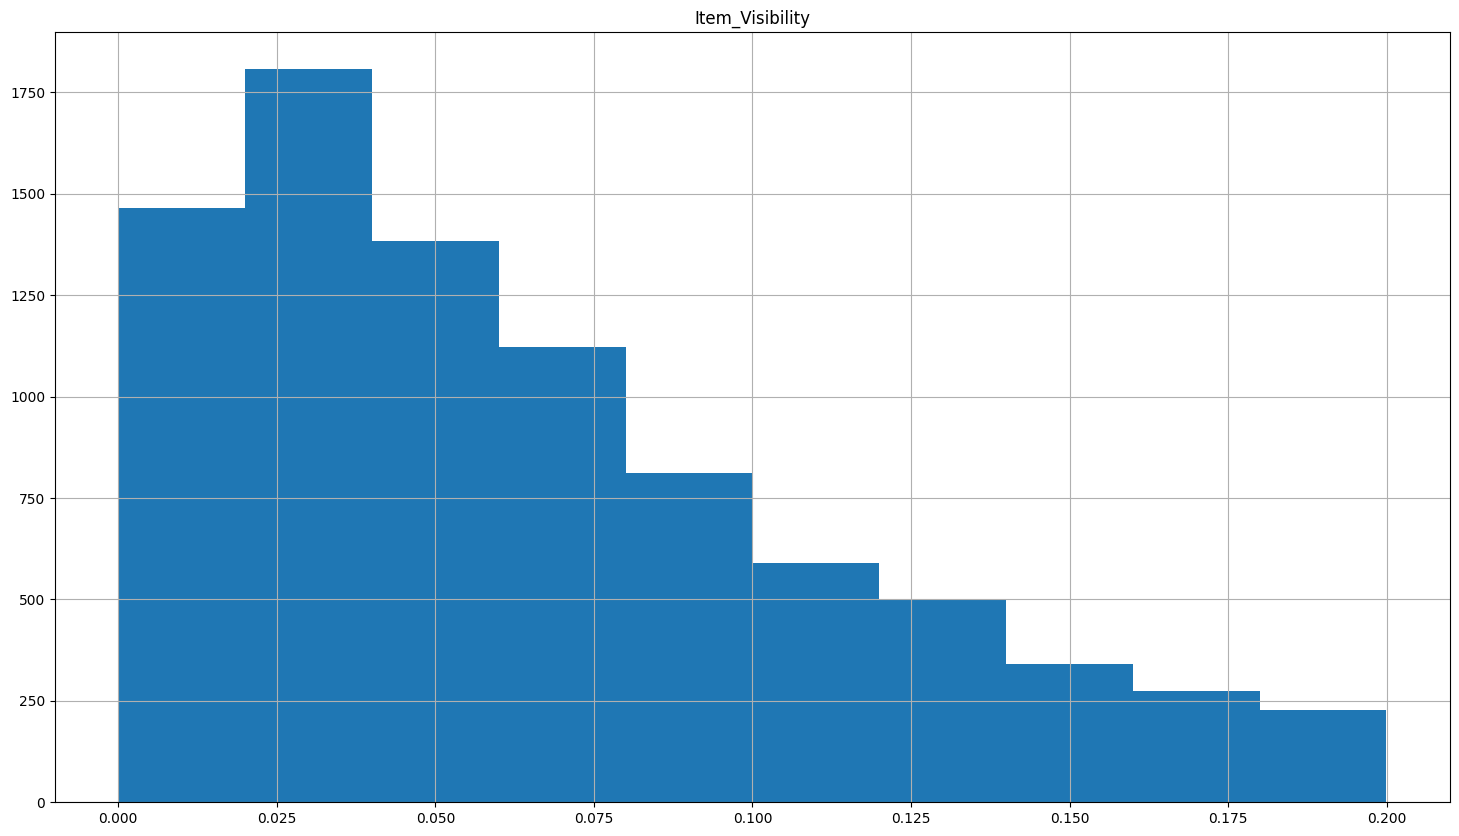

In [13]:
Train_Data.hist(['Item_Visibility'], figsize=(18,10))

* Variable Reduction

In [14]:
# removing columns that are not required for the model.
Train_Data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
Train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,1794.3310


## Visual Exploratory Data Analysis
* Categorical Variables: Barplot()<br />
* Continous Variables: Histogram

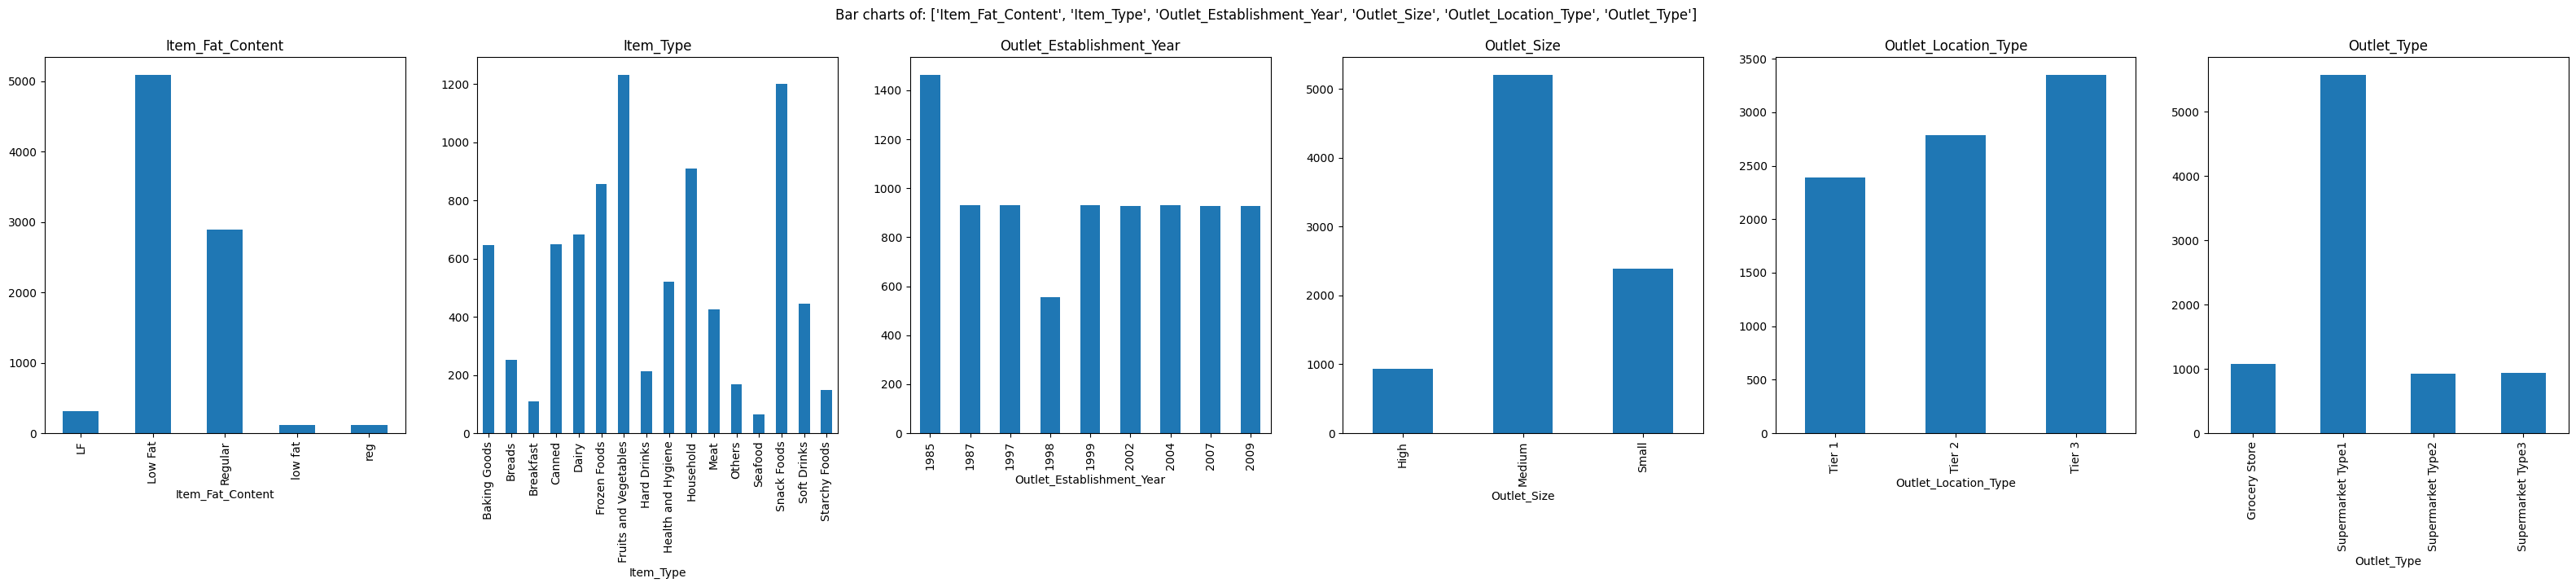

In [15]:
# Bar plots for the categorical variables.
def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
        subPlot[plotNumber].set_title(colName)
# Calling the function
PlotBarCharts(inpData=Train_Data, colsToPlot=['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type','Outlet_Type'])


## Defining the problem statement.<br />
Creating a Predictive model to tell Item_Outlet_Sales for the diffrent stores.<br />


We can notice that from the problem statement,<br />
The target variable is Item_Outlet_Sales.<br />
The predictors are Item_Weight - Outlet_Type.<br />

And since our target variable is a continuous variable, we can use regression to make our predictions<br />

## Feature Selection
Choosing the columns(Features) which are correlated to the Target variable.<br />
Visualizing the relationship between the features and the target variable.<br />
Starting with the continous variables.<br />

In [16]:
# continous Variables
def PlotScatterCharts(colsToPlot):
    for predictor in colsToPlot:
            Train_Data.plot.scatter(x=predictor, y='Item_Outlet_Sales', figsize=(10,5), title=predictor+" VS "+ 'Item_Outlet_Sales')

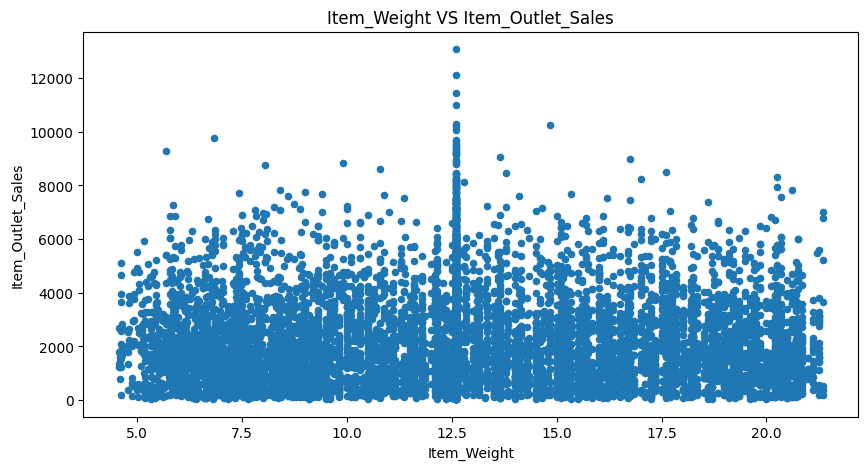

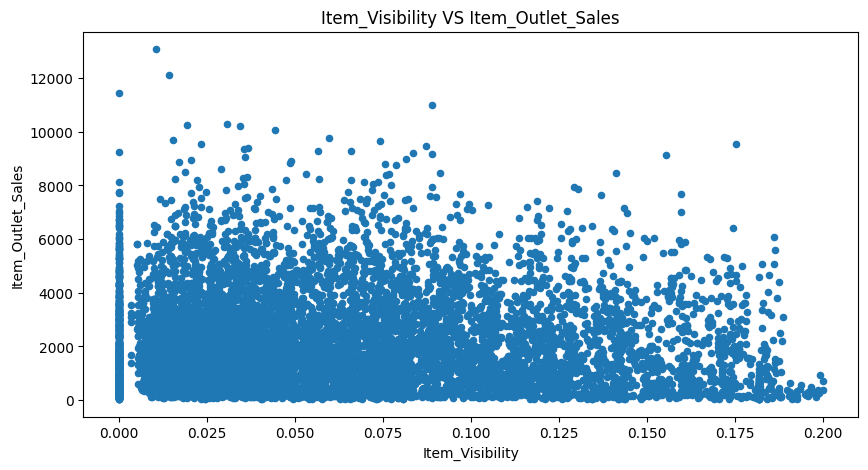

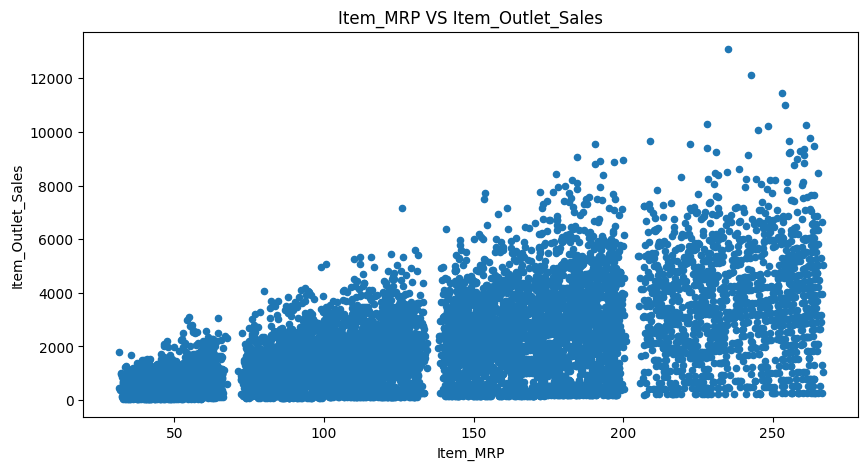

In [17]:
ContinuousColsList=['Item_Weight','Item_Visibility', 'Item_MRP']
PlotScatterCharts(ContinuousColsList)

Using a correlation matrix to visualize the relationship between the features and the target variable.<br />

<AxesSubplot: >

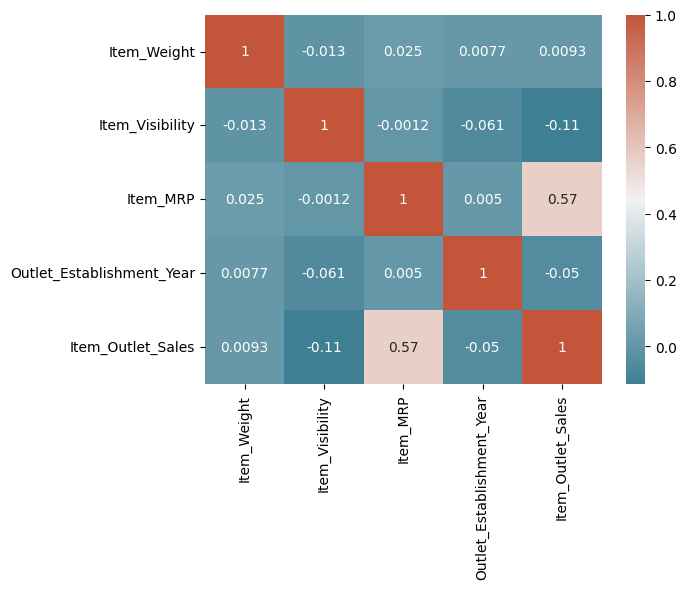

In [18]:
# a correlation matrix to see the correlation between the variables.
corr = Train_Data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


* Relationship between Categorical variables and the target variable.<br /> 

- Using the(Analysis of variance) ANOVA test.<br />
Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 being true

In [19]:
# Defining a function to find the statistical relationship between the categorical variables.
def AnovaFunction(Data,TargetVariable,CategoricalPredictorColumns):
    SelectedPredictors=[]
    print('ANOVA Test Results:\n')
    for predictor in CategoricalPredictorColumns:
        CategoryGroupList = Data.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupList)

        # printing the results and determinig if we reject the null hypothesis.
        if (AnovaResults[1]<0.05):
            print(f'{predictor} is correlated with {TargetVariable} | p-value: {AnovaResults[1]}')
            SelectedPredictors.append(predictor)
        else:
            print(f'{predictor} is NOT correlated with {TargetVariable} | p-value: {AnovaResults[1]}')
            
    return SelectedPredictors

In [20]:
# checking the statistical relationship between the categorical variables and the target variable.
CategoricalPredictorList=['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
AnovaFunction(Train_Data,'Item_Outlet_Sales',CategoricalPredictorList)

ANOVA Test Results:

Item_Fat_Content is NOT correlated with Item_Outlet_Sales | p-value: 0.15309075597905994
Item_Type is correlated with Item_Outlet_Sales | p-value: 0.0004524247508234801
Outlet_Establishment_Year is correlated with Item_Outlet_Sales | p-value: 5.012118370860362e-164
Outlet_Size is correlated with Item_Outlet_Sales | p-value: 1.0485024619728666e-18
Outlet_Location_Type is correlated with Item_Outlet_Sales | p-value: 6.3466916204343015e-24
Outlet_Type is correlated with Item_Outlet_Sales | p-value: 0.0


['Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

* Using the columns which are correlated to the target variable as our Final Predictors. <br />

In [21]:
SelectedColumns = ['Item_MRP','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
New_Train_Data = Train_Data[SelectedColumns]
New_Train_Data.head(10)

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,0.016047,Dairy,1999,Medium,Tier 1,Supermarket Type1
1,48.2692,0.019278,Soft Drinks,2009,Medium,Tier 3,Supermarket Type2
2,141.6180,0.016760,Meat,1999,Medium,Tier 1,Supermarket Type1
3,182.0950,0.000000,Fruits and Vegetables,1998,Medium,Tier 3,Grocery Store
4,53.8614,0.000000,Household,1987,High,Tier 3,Supermarket Type1
5,51.4008,0.000000,Baking Goods,2009,Medium,Tier 3,Supermarket Type2
6,57.6588,0.012741,Snack Foods,1987,High,Tier 3,Supermarket Type1
7,107.7622,0.127470,Snack Foods,1985,Medium,Tier 3,Supermarket Type3
8,96.9726,0.016687,Frozen Foods,2002,Medium,Tier 2,Supermarket Type1
9,187.8214,0.094450,Frozen Foods,2007,Medium,Tier 2,Supermarket Type1


In [22]:
# Saving this data for refrence during deployment.
New_Train_Data.to_pickle('New_Train_Data.pkl')

Data Pre-processing for Machine Learning

Convert each Ordinal Categorical columns to numeric (e.g. Outlet_Location_Type: Tier1, Tier2, Tier3)

Convert Binary nominal Categorical columns to numeric using 1/0 mapping (none in this dataset)

Convert all other nominal categorical columns to numeric using pd.get_dummies()

Data Transformation: Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [23]:
# Turning all categorical variables into numerical values can be done by mapping each categorical value with  
# respective FREQUENCY of the values in the column

cat_list = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_list:
    p  = New_Train_Data[i].value_counts().to_dict()
    New_Train_Data[i] = New_Train_Data[i].map(p)

#View the result
New_Train_Data    

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,0.016047,682,930,5203,2388,5577
1,48.2692,0.019278,445,928,5203,3350,928
2,141.6180,0.016760,425,930,5203,2388,5577
3,182.0950,0.000000,1232,555,5203,3350,1083
4,53.8614,0.000000,910,932,932,3350,5577
...,...,...,...,...,...,...,...
8518,214.5218,0.056783,1200,932,932,3350,5577
8519,108.1570,0.046982,648,929,5203,2785,5577
8520,85.1224,0.035186,520,930,2388,2785,5577
8521,103.1332,0.145221,1200,928,5203,3350,928


In [24]:
# Anding the target variable to the data.
New_Train_Data['Item_Outlet_Sales'] = Train_Data['Item_Outlet_Sales']
New_Train_Data

,Item_MRP,Item_Visibility,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,249.8092,0.016047,682,930,5203,2388,5577,3735.1380
1,48.2692,0.019278,445,928,5203,3350,928,443.4228
2,141.6180,0.016760,425,930,5203,2388,5577,2097.2700
3,182.0950,0.000000,1232,555,5203,3350,1083,732.3800
4,53.8614,0.000000,910,932,932,3350,5577,1794.3310
...,...,...,...,...,...,...,...,...
8518,214.5218,0.056783,1200,932,932,3350,5577,2778.3834
8519,108.1570,0.046982,648,929,5203,2785,5577,549.2850
8520,85.1224,0.035186,520,930,2388,2785,5577,1193.1136
8521,103.1332,0.145221,1200,928,5203,3350,928,1845.5976


## Building the Model
- Splitting the dataset into the Training set and Test set 

In [25]:
TargetVariable = 'Item_Outlet_Sales'
Predictors = [x for x in New_Train_Data.columns if x not in [TargetVariable]]

X = New_Train_Data[Predictors].values
y = New_Train_Data[TargetVariable].values

# Splitting the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

- Standardizing the data

In [26]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Choosing the scaler
PredictorScaler=MinMaxScaler()
# Storing the fit()
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the Standardized values of x
X = PredictorScalerFit.transform(X)

# Splitting the data into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- check for the sampled data

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6818, 7)
(1705, 7)
(6818,)
(1705,)


////Trial /////

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [31]:
y_pred

(1705,)

/////end trial///

In [28]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']= ((abs(TestingDataResults['Item_Outlet_Sales']-TestingDataResults['PredictedItem_Outlet_Sales']))/TestingDataResults['Item_Outlet_Sales'])* 100

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.4885084402625516

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1743.0644                      1717.0
1           356.8688                        -6.0
2           377.5086                       639.0
3          5778.4782                      3836.0
4          2356.9320                      3096.0
Mean Accuracy on test data: -8.179411797584933
Median Accuracy on test data: 60.28163435902305


NameError: name 'Accuracy_Values' is not defined

In [ ]:
# performing the AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Creating the model on Training Data
AdaBoostModel = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=42)
AdaBoostModel.fit(X_train,y_train)
prediction=AdaBoostModel.predict(X_test)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())



   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1743.0644                      3659.0
1           356.8688                      3562.0
2           377.5086                      3426.0
3          5778.4782                      4745.0
4          2356.9320                      3792.0


In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']= ((abs(TestingDataResults['Item_Outlet_Sales']-TestingDataResults['PredictedItem_Outlet_Sales']))/TestingDataResults['Item_Outlet_Sales'])* 100
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7390938251485297

##### Model Validation and Accuracy Calculations ##########
   Item_Outlet_Sales  PredictedItem_Outlet_Sales
0          1743.0644                      1065.0
1           356.8688                       770.0
2           377.5086                       500.0
3          5778.4782                      4893.0
4          2356.9320                      2339.0
Mean Accuracy on test data: 37.92823910994298
Median Accuracy on test data: 65.06522650568735

Accuracy values for 10-fold Cross Validation:
 [35.07409813 38.60827529 36.59717056 42.79412597 35.59649395 40.26453446
 40.30943215 39.18154487 42.86122584 37.39947302]

Final Average Accuracy of the model: 38.87


In [ ]:
#Trainig the model on the entire data
Sales_MODEL=RegModel.fit(X,y)


In [ ]:
# Save the model as a serialized object pickle
import pickle
import os

# Saving the final model
with open('Sales_MODEL.pkl', 'wb') as f:
    pickle.dump(Sales_MODEL, f)
    f.close()
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: d:\YR2 Sem2\MSCData Science\Supervised Learning


In [ ]:
# creating a function that be called to use the prediction model
def FunctionPredictResult(InputData):
    # Loading the saved model
    with open('Sales_MODEL.pkl', 'rb') as f:
        Sales_MODEL = pickle.load(f)
        f.close()
    #print('pickle file of Predictive Model is loaded from Location:',os.getcwd())
    
    # Converting the input data into dataframe
    InputData=pd.DataFrame(InputData, index=[0])
    
    # Selecting the required columns
    InputData=InputData[InputData.columns[InputData.columns.isin(Predictors)]]
    
    # Converting the categorical variables into dummy variables
    InputData=pd.get_dummies(InputData, columns=InputData.select_dtypes(include=['object']).columns)
    
    # Adding the missing columns in the input data
    MissingColumns=list(set(Predictors)-set(InputData.columns))
    for col in MissingColumns:
        InputData[col]=0
    
    # Reordering the columns in the same order as the training data
    InputData=InputData[Predictors]
    
    # Scaling the input data
    InputData=PredictorScalerFit.transform(InputData)
    
    # Predicting the result
    Result=Sales_MODEL.predict(InputData)
    
    return(Result)

Testing the model on another dataset

In [ ]:
# Removing the columns that are not required for prediction 
Test_Data=Test_Data.drop(columns=['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Outlet_Identifier'])

In [ ]:
# converting all the categorical variables to numeric
cat_var = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_var:
    p  = Test_Data[i].value_counts().to_dict()
    Test_Data[i] = Test_Data[i].map(p)

#View the result
Test_Data    

,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.007565,789,107.8622,620.0,1862.0,1591.0,3715.0
1,0.038428,454,87.3198,616.0,NaN,1856.0,3715.0
2,0.099575,111,241.7538,370.0,NaN,2232.0,720.0
3,0.015388,789,155.0340,616.0,NaN,1856.0,3715.0
4,0.118599,454,234.2300,976.0,1862.0,2232.0,623.0
...,...,...,...,...,...,...,...
5676,0.013496,789,141.3154,619.0,1592.0,1591.0,3715.0
5677,0.142991,121,169.1448,618.0,1862.0,2232.0,618.0
5678,0.073529,338,118.7440,619.0,NaN,1856.0,3715.0
5679,0.000000,435,214.6218,616.0,NaN,1856.0,3715.0


In [ ]:
# Imputimg the missing values
Test_Data['Item_Visibility'][Test_Data['Item_Visibility']>0.20] = 0.181769
Test_Data['Outlet_Size'].fillna(Test_Data['Outlet_Size'].mode()[0], inplace=True)
Test_Data['Outlet_Establishment_Year'].fillna(Test_Data['Outlet_Establishment_Year'].mode()[0])
Test_Data['Outlet_Location_Type'].fillna(Test_Data['Outlet_Location_Type'].mode()[0])
Test_Data['Outlet_Type'].fillna(Test_Data['Outlet_Type'].mode()[0])

0       3715.0
1       3715.0
2        720.0
3       3715.0
4        623.0
         ...  
5676    3715.0
5677     618.0
5678    3715.0
5679    3715.0
5680    3715.0
Name: Outlet_Type, Length: 5681, dtype: float64

In [ ]:
Test_Data.isnull().sum()

Item_Visibility              2
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    2
Outlet_Size                  0
Outlet_Location_Type         2
Outlet_Type                  5
dtype: int64

In [ ]:
Test_Data = Test_Data.dropna()

In [ ]:
# Calling the function for the prediction
FunctionPredictResult(InputData= Test_Data)


array([1720.20526667])